In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
import seaborn as sns
from xgboost import XGBRegressor

C:\Users\Wynns\anaconda3\envs\workspace\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### LR 補植 Function

In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#df補值-regression
def df_regression():
    imputation = df[['day', 'targeted_productivity','smv', 'wip', 'over_time', 'incentive', 'no_of_workers','actual_productivity']]
    known = imputation[imputation.wip.notnull()]
    unknown = imputation[imputation.wip.isnull()]
    x_train_pre = known[['smv']]
    y_train_pre = known['wip']
    test_pre = unknown[['smv']]
    x_train = x_train_pre.values
    x_train = x_train.tolist()
    y_train = y_train_pre.values
    y_train = y_train.tolist()
    test = test_pre.values
    test = test.tolist()
    lr.fit(x_train,y_train)
    predict = lr.predict(test)
    na_index_list = df.index[df['wip'].isnull()].tolist()
    for i in range(0,len(na_index_list)):
        df.loc[na_index_list[i], 'wip'] = int (predict[i])
        df.loc[na_index_list[i], 'incentive'] = int (df['incentive'].mean())
    df.to_csv('train_regression.csv')

def df_test_regression():
    imputation = df_test[['day', 'targeted_productivity','smv', 'wip', 'over_time', 'incentive', 'no_of_workers']]
    known = imputation[imputation.wip.notnull()]
    unknown = imputation[imputation.wip.isnull()]
    x_test_pre = known[['smv']]
    y_test_pre = known['wip']
    test_pre_test = unknown[['smv']]
    x_test = x_test_pre.values
    x_test = x_test.tolist()
    y_test = y_test_pre.values
    y_test = y_test.tolist()
    test = test_pre_test.values
    test = test.tolist()
    lr.fit(x_test,y_test)
    predict = lr.predict(test)
    na_index_list = df_test.index[df_test['wip'].isnull()].tolist()
    for i in range(0,len(na_index_list)):
        df_test.loc[na_index_list[i], 'wip'] = int (predict[i])
        df_test.loc[na_index_list[i], 'incentive'] = int (df_test['incentive'].mean())
    df_test.to_csv('test_regression.csv')

#### Data

In [3]:
df = pd.read_csv(r'./train.csv')

# Preprocess department
print("Preprocess department\n""BEFORE:")
print(df.department.value_counts())
df=df.replace(['finishing '], ['finishing'])
print("---------------------\nAFTER:")
print(df.department.value_counts())

# PreProcess wip
print("=====================")
print("Preprocess wip\n""BEFORE:")
print(df.isna().sum())
df['wip'].fillna(0,inplace=True)
print("---------------------\nAFTER:")
print(df.isna().sum())

# Category Encoder
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
df['quarter'] = le.fit_transform(df['quarter'])
df['department'] = le.fit_transform(df['department'])
df['day'] = le.fit_transform(df['day'])

X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

# Numerical Variable
scaler = MinMaxScaler()
# scaler = Normalizer()
X_scaled = scaler.fit_transform(X)
X_scaled

Preprocess department
BEFORE:
sweing        561
finishing     257
finishing     139
Name: department, dtype: int64
---------------------
AFTER:
sweing       561
finishing    396
Name: department, dtype: int64
Preprocess wip
BEFORE:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      396
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
---------------------
AFTER:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time            

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.65517241],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06896552],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.32758621],
       ...,
       [0.87234043, 0.75      , 1.        , ..., 0.        , 0.5       ,
        0.64367816],
       [0.87234043, 0.75      , 0.        , ..., 0.        , 0.        ,
        0.08045977],
       [0.87234043, 0.75      , 0.        , ..., 0.        , 0.        ,
        0.06896552]])

In [4]:
df_test = pd.read_csv(r'./test.csv')

# Preprocess department
print("Preprocess department\n""BEFORE:")
print(df_test.department.value_counts())
df_test=df_test.replace(['finishing '], ['finishing'])
print("---------------------\nAFTER:")
print(df_test.department.value_counts())

# PreProcess wip
print("=====================")
print("Preprocess wip\n""BEFORE:")
print(df_test.isna().sum())
df_test['wip'].fillna(0,inplace=True)
print("---------------------\nAFTER:")
print(df_test.isna().sum())

# Category Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_test['date'] = le.fit_transform(df_test['date'])
df_test['quarter'] = le.fit_transform(df_test['quarter'])
df_test['department'] = le.fit_transform(df_test['department'])
df_test['day'] = le.fit_transform(df_test['day'])

X_test = df_test[df_test.columns]

# Numerical Variable
scaler = MinMaxScaler()
# scaler = Normalizer()
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

Preprocess department
BEFORE:
sweing       130
finishing    110
Name: department, dtype: int64
---------------------
AFTER:
sweing       130
finishing    110
Name: department, dtype: int64
Preprocess wip
BEFORE:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      110
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
dtype: int64
---------------------
AFTER:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_chan

array([[0.        , 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.5       ,
        0.96226415],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.03773585],
       ...,
       [0.36363636, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.03773585],
       [0.36363636, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.16981132],
       [0.36363636, 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Ridge Regression

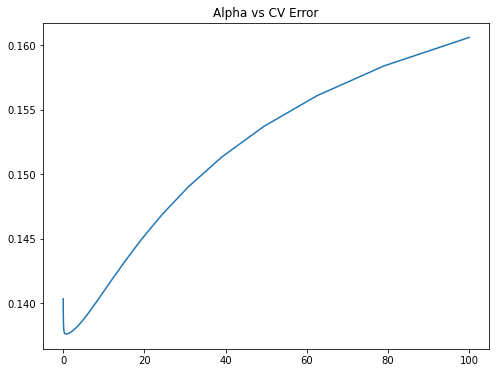

Min CV Error: 0.7196856730011522 0.1376168607424091


In [32]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, X_scaled, y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(alphas, test_scores)
plt.title('Alpha vs CV Error')
plt.show()
print("Min CV Error:",alphas[test_scores.index(min(test_scores))],min(test_scores))


Random Forest

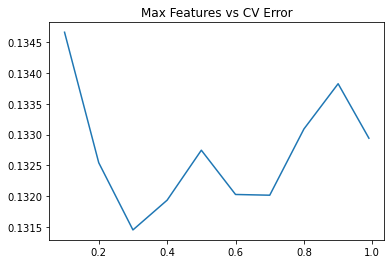

Min CV Error: 0.3 0.13145255901376757


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [8]:
max_features = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
test_scores=[]
for max_feature in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feature)
    test_score = np.sqrt(-cross_val_score(clf, X_scaled, y, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title('Max Features vs CV Error')
plt.show()
print("Min CV Error:",max_features[test_scores.index(min(test_scores))],min(test_scores))
max_features

Ridge & RF Essenble

In [56]:
ridge = Ridge(alpha=0.0015998587196060573)
rf = RandomForestRegressor(n_estimators=200, max_features=0.3)
ridge.fit(X_scaled,y)
rf.fit(X_scaled,y)

y_ridge = np.expm1(ridge.predict(X_test_scaled))
y_rf = np.expm1(rf.predict(X_test_scaled))

y_pred = (y_ridge + y_rf) / 2

df_ans = pd.DataFrame(y_pred.astype(float), columns=['actual_productivity'])
df_ans.to_csv('mySubmission.csv', index_label='Id')

Bagging

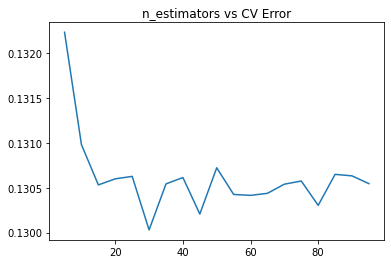

Min CV Error: 30 - 0.13002947583877605


In [12]:
from sklearn.ensemble import BaggingRegressor
rf = RandomForestRegressor(n_estimators=200, max_features=0.3)
# bagging 把很多小的分類器放在一起，每個train隨機的一部分數據，然後把它們的最終結果綜合起來（多數投票）
# bagging 算是一種算法框架
# params = [1,10,15,20,25,30,40]
params = np.arange(5, 100, 5)
test_scores = []
for param in params:
    clf = BaggingRegressor(base_estimator=rf, n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_scaled, y, cv = 10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

plt.plot(params,test_scores)
plt.title('param vs CV Error')
plt.show()
print("Min CV Error:",params[test_scores.index(min(test_scores))],"-",min(test_scores))

In [ ]:
# br = BaggingRegressor(base_estimator = rf,n_estimators = 10)
# br.fit(X_scaled,y)
# y_pred = np.expm1(br.predict(X_test_scaled))
#
# df_ans = pd.DataFrame(y_pred.astype(float), columns=['actual_productivity'])
# df_ans.to_csv('mySubmission.csv', index_label='Id')

AdaBoost

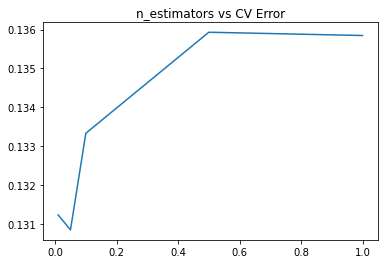

Min CV Error: 0.05 - 0.13084476897990724


In [11]:
from sklearn.ensemble import AdaBoostRegressor
params = [0.01,0.05,0.1,0.5,1.0]
rf = RandomForestRegressor(n_estimators=200, max_features=0.3)
test_scores = []
for param in params:
    clf = AdaBoostRegressor(base_estimator = rf,n_estimators = 10,learning_rate=param)
    test_score = np.sqrt(-cross_val_score(clf,X_scaled,y,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(params,test_scores)
plt.title('param vs CV Error')
plt.show()
print("Min CV Error:",params[test_scores.index(min(test_scores))],"-",min(test_scores))

In [95]:
br = AdaBoostRegressor(base_estimator = rf,n_estimators = 25)
br.fit(X_scaled,y)
y_pred = np.expm1(br.predict(X_test_scaled))

df_ans = pd.DataFrame(y_pred.astype(float), columns=['actual_productivity'])
df_ans.to_csv('mySubmission.csv', index_label='Id')

XGBoost

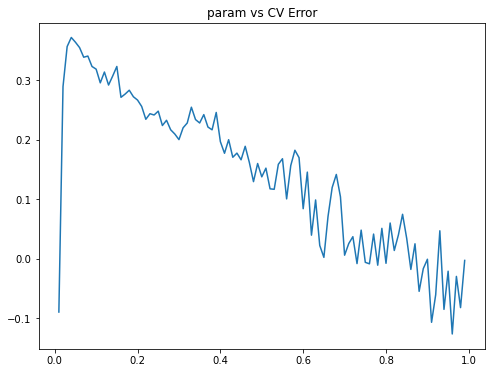

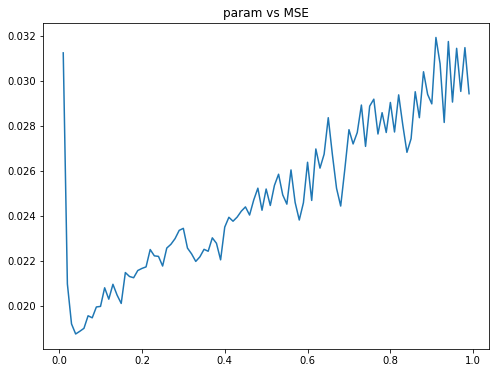

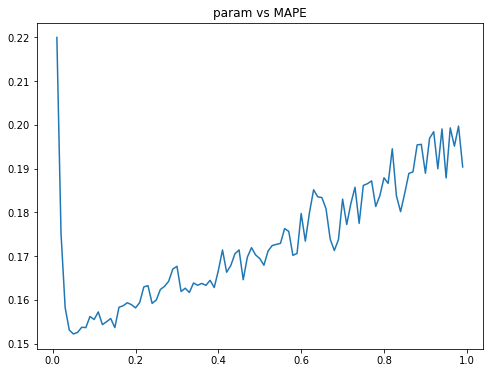

Max R2  : 0.04 : 0.3719
Min MSE : 0.04 : 0.0187
Min MAPE: 0.05 : 0.1522


In [33]:
from xgboost import XGBRegressor
# params = [1,2,3,4,5,6]
# params = np.arange(50, 150, 10)
params = np.arange(0.01,1.0,0.01)
# params = np.arange(1,20,1)
# test_scores_0 = []
test_scores_1 = []
test_scores_2 = []
test_scores_3 = []
for param in params:
    clf = XGBRegressor(n_estimators=90, learning_rate=param, subsample=0.94, objective='reg:squarederror')
    # clf = XGBRegressor(n_estimators=90, objective='reg:squarederror')
    # test_score = np.sqrt(-cross_val_score(clf,X_scaled,y,cv = 10,scoring = 'neg_mean_squared_error'))
    # test_scores_0.append(test_score.mean())
    test_scores = cross_validate(clf, X_scaled, y, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error'))
    test_scores_1.append(test_scores['test_r2'].mean())
    test_scores_2.append(-test_scores['test_neg_mean_squared_error'].mean())
    test_scores_3.append(-test_scores['test_neg_mean_absolute_percentage_error'].mean())
plt.plot(params,test_scores_1)
plt.title('param vs CV Error')
plt.show()
plt.plot(params,test_scores_2)
plt.title('param vs MSE')
plt.show()
plt.plot(params,test_scores_3)
plt.title('param vs MAPE')
plt.show()
print("Max R2  : %.2f : %.4f" % (params[test_scores_1.index(max(test_scores_1))],max(test_scores_1)))
print("Min MSE : %.2f : %.4f" % (params[test_scores_2.index(min(test_scores_2))],min(test_scores_2)))
print("Min MAPE: %.2f : %.4f" % (params[test_scores_3.index(min(test_scores_3))],min(test_scores_3)))

#### Predict and Output

R2: 0.1502 (std: 0.0178)
R2: 0.2218 (std: 0.1153)
MSE: 0.0229 (std: 0.0052)
MAPE: 0.1643 (std: 0.0345)


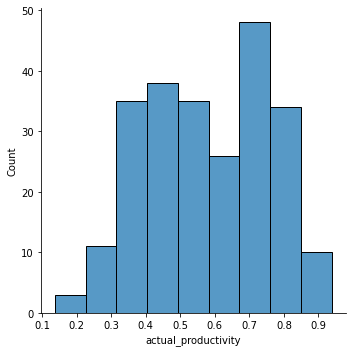

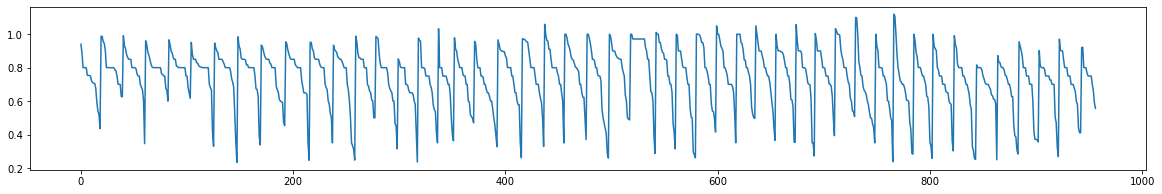

In [9]:
from matplotlib import pyplot as plt

#{'colsample_bytree': 0.5691680620156075, 'learning_rate': 0.23309215523307059, 'max_depth': 6.0}
xgb=XGBRegressor(n_estimators = 90,
                 objective='reg:squarederror') # Test 0.14106
# xgb = XGBRegressor(n_estimators=90, objective='reg:squarederror') # Peter
# xgb = XGBRegressor() # Original
score = np.sqrt(-cross_val_score(xgb, X_scaled, y, cv = 5, scoring = 'neg_mean_squared_error'))
print("R2: %0.4f (std: %0.4f)" % (score.mean(), score.std()))
scores = cross_validate(xgb, X_scaled, y, cv=5, scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_percentage_error'))
print("====================================")
print("R2: %0.4f (std: %0.4f)" % (scores['test_r2'].mean(), scores['test_r2'].std()))
print("MSE: %0.4f (std: %0.4f)" % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std()))
print("MAPE: %0.4f (std: %0.4f)" % (-scores['test_neg_mean_absolute_percentage_error'].mean(), scores['test_neg_mean_absolute_percentage_error'].std()))
xgb.fit(X_scaled, y)
y_pred = xgb.predict(X_test_scaled)

df_ans = pd.DataFrame(y_pred.astype(float), columns=['actual_productivity'])
df_ans.to_csv('mySubmission.csv', index_label='Id')
sns.displot(df_ans['actual_productivity'])
fig=plt.figure()
plt.plot(df['actual_productivity'])
# plt.plot(df_ans)
plt.rcParams["figure.figsize"] = (8, 6)
fig.set_figheight(3)
fig.set_figwidth(20)
plt.show()

#### hyperopt

In [10]:
from sklearn.metrics import mean_squared_error
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 0)

space={# 'max_depth': hp.quniform("max_depth", 1, 18, 1),
       # 'gamma': hp.uniform ('gamma', 1,9),
       # 'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
       # 'reg_lambda' : hp.uniform('reg_lambda', 0,1),
       # 'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
       # 'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
       'n_estimators': 90,
       'learning_rate': hp.uniform('learning_rate', 0.1, 0.5)
    }

def objective(space):

    clf=XGBRegressor(# max_depth = int(space['max_depth']),
                     # gamma = space['gamma'],
                     # reg_alpha = int(space['reg_alpha']),
                     # reg_lambda = space['reg_lambda'],
                     # colsample_bytree=space['colsample_bytree'],
                     # min_child_weight=space['min_child_weight'],
                     n_estimators=space['n_estimators'],
                     learning_rate=space['learning_rate'])

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print ("SCORE:", mse)
    return {'loss': mse, 'status': STATUS_OK, 'model': clf }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:                                                 
0.022360925334051058                                   
SCORE:                                                 
0.02156036979196105                                                                
SCORE:                                                                             
0.022701477443264093                                                              
SCORE:                                                                            
0.021911864336317602                                                              
SCORE:                                                                            
0.022058946815801943                                                              
SCORE:                                                                            
0.022436849625094624                                                              
SCORE:                                                                            


GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1, 0.3],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.5, 0.7, 0.9],
           'subsample': [0.6, 0.8, 1.0]}
xgbr = XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=1)
clf.fit(X_scaled, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

#### History

In [ ]:
# xgb = XGBRegressor(n_estimators=90, objective='reg:squarederror') # Peter 0.12303
# xgb = XGBRegressor(max_depth=7, n_estimators=70, learning_rate=0.05, objective='reg:squarederror') # Test 0.14412
# xgb = XGBRegressor(max_depth=3, n_estimators=100, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8, objective='reg:squarederror') # Test 0.14106